# Project One - Face Mask Detection 

- **Domain**: Entertainment
- **Context**: Company X owns a movie application and repository which caters movie streaming to millions of users on subscription basis. Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision and multimedia experts who need to detect faces from screen shots from the movie scene.
- **Data Description**: The dataset comprises of images and its mask where there is a human face.
-**Project Objective**: *Face detection* from training images

**NOTE**: The images might not get rendered in *html* format. For that please check the notebook.

## Import Libraries

In [ ]:
import numpy as np # mathematical manipulations
import pandas as pd # data manipulations

# for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2

# splitting into train and test sets
from sklearn.model_selection import train_test_split

# Neural Network libraries
import tensorflow as tf

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# initialize random number generator
import random
# set the seed for consistent results for multiple runs
seed = 7
np.random.seed(seed)

## Data Warehouse

In [ ]:
# copy data to current working directory
!cp '/content/drive/MyDrive/Colab Notebooks/images.npy' .

In [ ]:
# verify data copy
!ls -l

total 1325080
drwx------ 5 root root       4096 Mar 20 12:43 drive
-rw------- 1 root root 1356868279 Mar 20 12:44 images.npy
drwxr-xr-x 1 root root       4096 Mar  9 14:48 sample_data


In [ ]:
# load dataset as NumPy array
dataset = np.load(file='/content/images.npy',allow_pickle=True)

In [ ]:
# verify type of dataset
type(dataset)

numpy.ndarray

In [ ]:
# verify shape of dataset
dataset.shape

(409, 2)

In [ ]:
# observe the first record
dataset[0]

array([array([[[42, 37, 34],
               [56, 51, 48],
               [71, 66, 63],
               ...,
               [23, 33, 34],
               [26, 36, 37],
               [28, 38, 39]],

              [[40, 35, 32],
               [51, 46, 43],
               [64, 59, 56],
               ...,
               [27, 36, 35],
               [24, 33, 32],
               [26, 35, 34]],

              [[43, 38, 35],
               [51, 46, 43],
               [61, 56, 53],
               ...,
               [28, 30, 27],
               [33, 35, 32],
               [35, 37, 34]],

              ...,

              [[56, 47, 40],
               [57, 48, 41],
               [61, 52, 45],
               ...,
               [67, 48, 42],
               [55, 35, 28],
               [60, 40, 33]],

              [[53, 44, 37],
               [54, 45, 38],
               [57, 48, 41],
               ...,
               [59, 40, 34],
               [60, 40, 33],
               [54, 34, 27]],



In [ ]:
# seeing image part
dataset[0,0]

array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8)

In [ ]:
# observing mask, label and bounding box
dataset[0,1]

[{'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}]},
 {'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}]}]

In [ ]:
# separating data into images and masks
images = dataset[:,0]
masks = dataset[:,1]

In [ ]:
# verify images shape
images.shape

(409,)

In [ ]:
# verify masks shape
masks.shape

(409,)

### Observations:
- The data is provided as a **numpy** array.
- We have **409** images for training a face detection model.
- The dataset comprises of an *actual image* as an array and the associated *labels*, *mask* and *bounding box* co-ordinates.
- The *bounding box co-ordinates* are in scaled form.

## Visualisation

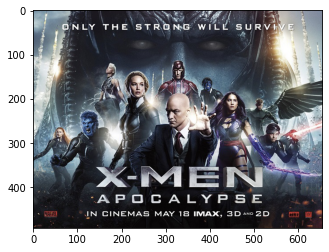

In [ ]:
plt.imshow(images[408])

In [ ]:
display(masks[408])

[{'imageHeight': 493,
  'imageWidth': 656,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.3201219512195122, 'y': 0.2839756592292089},
   {'x': 0.4009146341463415, 'y': 0.4198782961460446}]},
 {'imageHeight': 493,
  'imageWidth': 656,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.4557926829268293, 'y': 0.38742393509127787},
   {'x': 0.5442073170731707, 'y': 0.5618661257606491}]},
 {'imageHeight': 493,
  'imageWidth': 656,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.6707317073170732, 'y': 0.38336713995943206},
   {'x': 0.7134146341463414, 'y': 0.4746450304259635}]},
 {'imageHeight': 493,
  'imageWidth': 656,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.16615853658536586, 'y': 0.4665314401622718},
   {'x': 0.22560975609756098, 'y': 0.563894523326572}]},
 {'imageHeight': 493,
  'imageWidth': 656,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.07164634146341463, 'y': 0.539553752535497},
   {'x': 0.11280487804878049, 'y': 0.586206896551

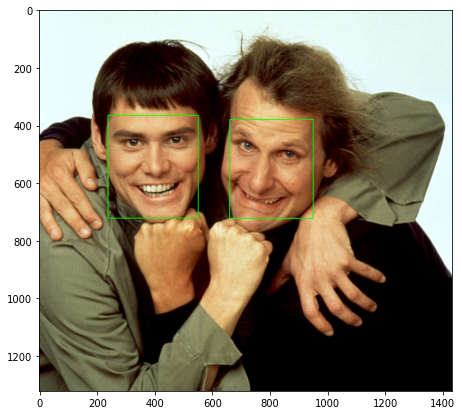

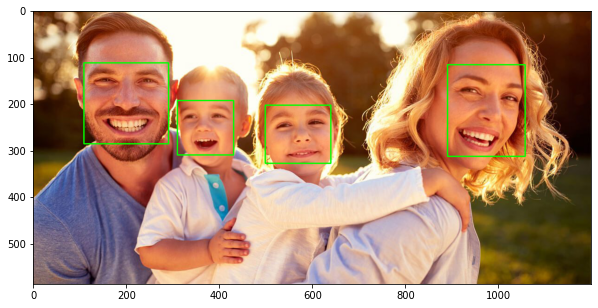

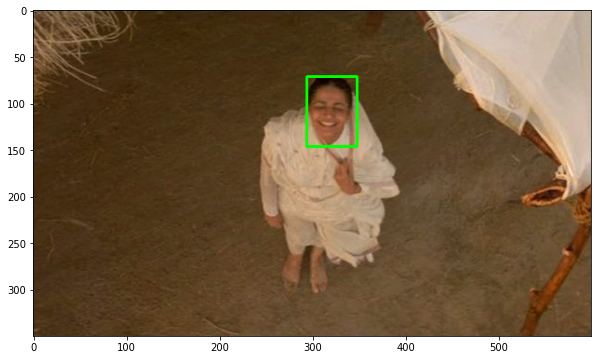

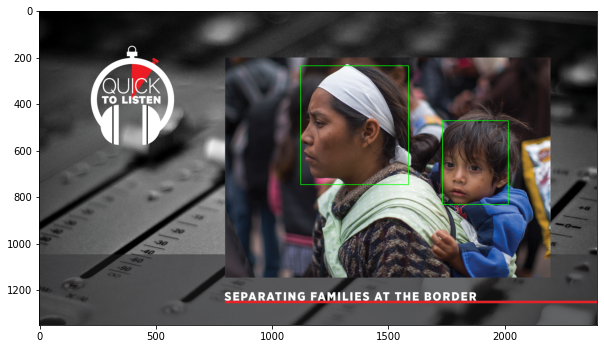

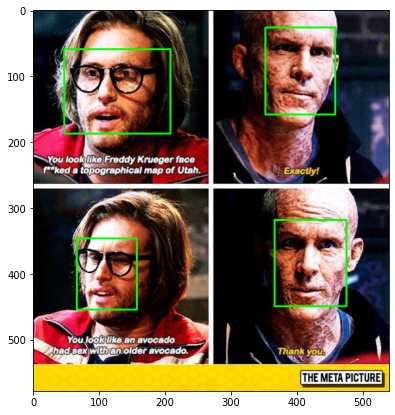

In [ ]:
# display random five images with bounding boxes - these would actually correspond to the  mask locations
for i in range(0,5):
  #Pickup a random image number
  img_num = np.random.randint(0, images.shape[0])

  #Read the image
  img = images[img_num]

  #Draw rectangle(s) as per bounding box information
  for dictionary in masks[img_num]:
    # get image height and width for scaling
    image_height = dictionary['imageHeight']
    image_width = dictionary['imageWidth']

    # get min box coordinates
    xmin = np.float32(dictionary['points'][0]['x'] * image_width)
    ymin = np.float32(dictionary['points'][0]['y'] * image_height)

    # get max box coordinates
    xmax = np.float32(dictionary['points'][1]['x'] * image_width)
    ymax = np.float32(dictionary['points'][1]['y'] * image_height)

    #Get Label
    label = dictionary['label'][0]

    #Add bounding box
    cv2.rectangle(img, (xmin,ymin), (xmax, ymax), (0,255,0), 2)

  #Draw image using matplotlib
  plt.figure(figsize=(10,7))
  plt.imshow(img)
  plt.show()

### Observations:
- Images are of *varying* height and width. So, *resize* is required.
- The bounding boxes or the masks are in form of rectangles.
- The masks are scaled versions of actuals.
- The task seems to revolve around *detection* or *segmentation*.
- For the notebook we will focus on *segmentation* approach for *face mask detection*.

## Data Preparation

In [ ]:
# set constants
IMG_SIZE = 224
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_DEPTH = 3

In [ ]:
# split data into train, validation and test
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2)

print(f"Shape of X_train is '{X_train.shape}' and the shape of y_train is '{y_train.shape}'")
print(f"Shape of X_val is '{X_val.shape}' and the shape of y_val is '{y_val.shape}'")
print(f"Shape of X_test is '{X_test.shape}' and the shape of y_test is '{y_test.shape}'")

Shape of X_train is '(327,)' and the shape of y_train is '(327,)'
Shape of X_val is '(65,)' and the shape of y_val is '(65,)'
Shape of X_test is '(17,)' and the shape of y_test is '(17,)'


In [ ]:
def get_images_masks(images,masks):

  # initialise arrays to hold data
  #Input image is size IMG_HEIGHT,IMG_WIDTH,IMG_DEPTH
  img_batch = np.zeros((images.shape[0], IMG_HEIGHT, IMG_WIDTH,IMG_DEPTH))
  #Mask's size is IMG_HEIGHT, IMG_WIDTH
  mask_batch = np.zeros((masks.shape[0], IMG_HEIGHT, IMG_WIDTH))

  #Populate X and y with actual data
  for i in range(images.shape[0]):

    #Resize image
    img = images[i]
    img = cv2.resize(img, dsize=(IMG_HEIGHT, IMG_WIDTH), interpolation=cv2.INTER_CUBIC)

    # assign all pixels in the first 3 channels only to the image, i.e., discard the alpha channel
    try:
      img = img[:,:,:3]
    except:
      # convert the grayscale image to color so that the number of channels are standardized to 3
      img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
      continue

    # pre-process input as per the pre-trained model used and add to the batch
    img_batch[i] = tf.keras.applications.mobilenet_v2.preprocess_input(np.array(img, dtype=np.float32))

    # Read Masks
    for dictionary in masks[i]:
      # get min mask co-ordinates
      xmin = int(dictionary['points'][0]['x'] * IMG_WIDTH)
      ymin = int(dictionary['points'][0]['y'] * IMG_HEIGHT)

      # get max mask co-ordinates
      xmax = int(dictionary['points'][1]['x'] * IMG_WIDTH)
      ymax = int(dictionary['points'][1]['y'] * IMG_HEIGHT)

      # set all pixels within the mask co-ordinates to 1.
      mask_batch[i][ymin:ymax,xmin:xmax] = 1
  return img_batch, mask_batch 

In [ ]:
# Change to tensors
X_train , y_train = get_images_masks(X_train,y_train)
X_val, y_val = get_images_masks(X_val, y_val)
X_test, y_test = get_images_masks(X_test, y_test)

print(f"Shape of X_train is '{X_train.shape}' and the shape of y_train is '{y_train.shape}'")
print(f"Shape of X_val is '{X_val.shape}' and the shape of y_val is '{y_val.shape}'")
print(f"Shape of X_test is '{X_test.shape}' and the shape of y_test is '{y_test.shape}'")

Shape of X_train is '(327, 224, 224, 3)' and the shape of y_train is '(327, 224, 224)'
Shape of X_val is '(65, 224, 224, 3)' and the shape of y_val is '(65, 224, 224)'
Shape of X_test is '(17, 224, 224, 3)' and the shape of y_test is '(17, 224, 224)'


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


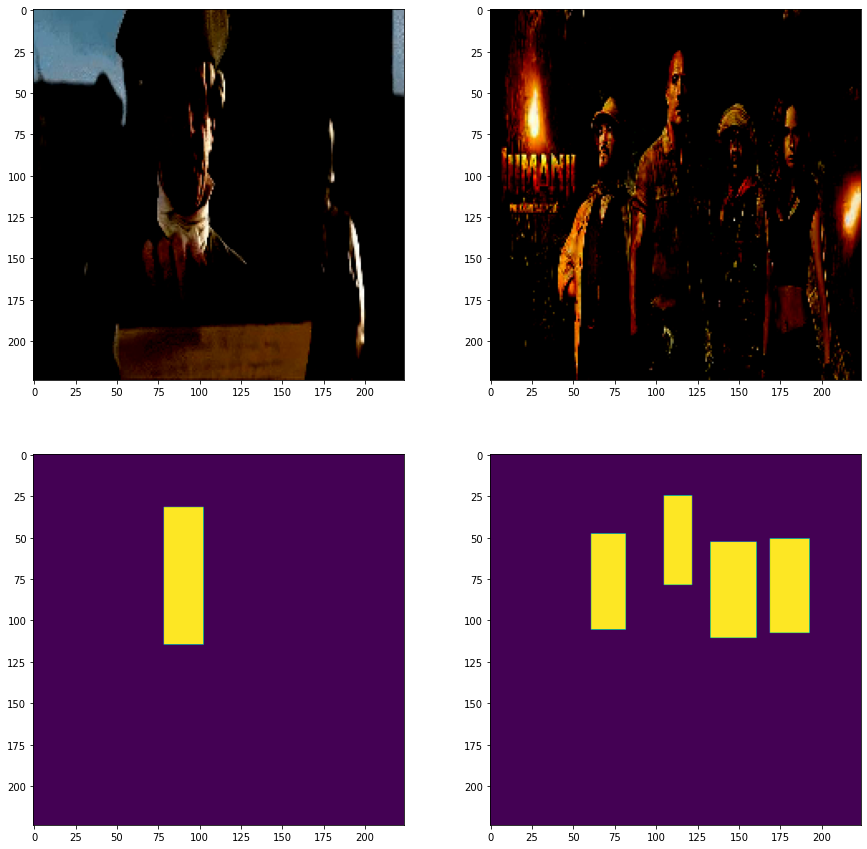

In [ ]:
# visualise masks and images for generator for verification

idx = np.random.randint(0,X_train.shape[0],2)
# initialising subplots
figure, ax = plt.subplots(nrows=2, ncols=2)

# setting figure parameters
figure.set_figheight(15)
figure.set_figwidth(15)

# setting images and masks to axis
ax[0][0].imshow(X_train[idx][0])
ax[1][0].imshow(y_train[idx][0])

ax[0][1].imshow(X_train[idx][1])
ax[1][1].imshow(y_train[idx][1])


plt.show()

### Observations:
- Size of each image is **224x224x3** and each mask is **224x224**.
- We have **327 train images and corresponding masks**.
- We have **65 validation images and corresponding masks**.
- We have **17 testing images and corresponding masks**.
- The image lighting conditions are different and all correspond to rectangular masks for faces.

## Model Building

We will be using **Transfer Learning** technique to get a *pre-trained* model(*MobileNet* in our case) and form a **U-Net** architecture for *segmentation*.
Clearly we are going for *semantic segmentation* because all we are detecting is a face. The same problem can be extended for *instance segmentation* and a *Mask R-CNN* can be used.

The **pre-trained MobileNet** will be used as the **encoder** part of the **U-Net** Architecture. The **decoder** part will be built using *upsampling* layers.

In [ ]:
#Define input layer
input_tensor = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH), name='input_img')

In [ ]:
# download pre-trained model
pre_trained_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_tensor= input_tensor,
                                                                   alpha=0.5,
                                                                   weights='imagenet',
                                                                   include_top=False)

3211264/3201480 [==============================] - 0s 0us/step


In [ ]:
print(f'Number of layers in MobileNet are {len(pre_trained_model.layers)}')

Number of layers in MobileNet are 154


In [ ]:
# describing the pre trained model
pre_trained_model.summary()

Model: "mobilenetv2_0.50_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 16  432         ['input_img[0][0]']              
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 16  64          ['Conv1[0][0]']                  
                                )                                              

In [ ]:
def conv2d_block(input_tensor, n_filters):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = tf.keras.layers.Conv2D(n_filters, (3,3), kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    
    # second layer
    x = tf.keras.layers.Conv2D(n_filters, (3,3), kernel_initializer = 'he_normal', padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    
    return x

In [ ]:
def build_decoder_block(input, layer_name, number_of_filters):
  layer_output = pre_trained_model.get_layer(layer_name).output
  x = tf.keras.layers.UpSampling2D()(input)
  #Skip connection
  x = tf.keras.layers.Concatenate()([x, layer_output])
  x = conv2d_block(x,number_of_filters)
  return x

In [ ]:
def build_decoder():
  
  skip_connection_names = ["input_img", "block_1_expand_relu", "block_3_expand_relu", "block_6_expand_relu"]
  encoder_output = pre_trained_model.get_layer('block_13_expand_relu').output
  filters = [16, 32, 48, 64]

  x = encoder_output
  for i in range(1, len(skip_connection_names)+1):

    # Decoder blocks
    layer_name = skip_connection_names[-i]
    number_of_filters = filters[-i]
    x = build_decoder_block(x,layer_name,number_of_filters)

  return x

In [ ]:
decoder = build_decoder()

In [ ]:
def build_model(input,decoder):
  #Build the Output layer
  outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(decoder)

  #Build the model using different layers
  model = tf.keras.Model(inputs=[input], outputs=[outputs])
  return model

In [ ]:
final_model = build_model(pre_trained_model.input,decoder)

In [ ]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 16  432         ['input_img[0][0]']              
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 16  64          ['Conv1[0][0]']                  
                                )                                                             

## Train the model

We will use  **Dice Coefficient** for evaluation

In [ ]:
# define DICE-COEFFICIENT
smooth = tf.keras.backend.epsilon() # prevent zero error
def dice_coef(y_true, y_pred, smooth=1):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    """
    intersection = tf.keras.backend.sum(tf.keras.backend.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(tf.keras.backend.square(y_true),-1) + tf.keras.backend.sum(tf.keras.backend.square(y_pred),-1) + smooth)

In [ ]:
# LOSS CORRESPONDING TO DICE COEFF
def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [ ]:
# compile the model
opt = tf.keras.optimizers.Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
metrics = [dice_coef, tf.keras.metrics.Recall(), tf.keras.metrics.Precision()]
final_model.compile(loss=dice_coef_loss, optimizer=opt, metrics=metrics)

In [ ]:
BATCH_SIZE = 8
EPOCHS = 50

In [ ]:
# introduce model callbacks
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4,min_lr=1e-6, verbose=1, mode="min"),
    tf.keras.callbacks.ModelCheckpoint("face_mask_model.h5", monitor="val_loss", verbose=1, save_best_only=True, mode="min")
]

In [ ]:
train_step_size = np.ceil(X_train.shape[0]/BATCH_SIZE)
val_step_size = np.ceil(X_val.shape[0]/BATCH_SIZE)
test_step_size = np.ceil(X_test.shape[0]/BATCH_SIZE)

train_step_size, val_step_size, test_step_size

(41.0, 9.0, 3.0)

In [ ]:
# train the model
training_history = final_model.fit(X_train, y_train,
          steps_per_epoch=train_step_size, 
          validation_data=(X_val,y_val), 
          validation_steps=val_step_size, 
          callbacks=callbacks,
          epochs=EPOCHS)

Epoch 1/50
41/41 [==============================] - ETA: 0s - loss: 0.4245 - dice_coef: 0.5755 - recall_2: 0.9045 - precision_2: 0.7315
Epoch 1: val_loss improved from inf to 0.41279, saving model to face_mask_model.h5
41/41 [==============================] - 17s 257ms/step - loss: 0.4245 - dice_coef: 0.5755 - recall_2: 0.9045 - precision_2: 0.7315 - val_loss: 0.4128 - val_dice_coef: 0.5872 - val_recall_2: 0.8882 - val_precision_2: 0.7163 - lr: 1.0000e-04
Epoch 2/50
41/41 [==============================] - ETA: 0s - loss: 0.4140 - dice_coef: 0.5860 - recall_2: 0.9155 - precision_2: 0.7332
Epoch 2: val_loss did not improve from 0.41279
41/41 [==============================] - 8s 192ms/step - loss: 0.4140 - dice_coef: 0.5860 - recall_2: 0.9155 - precision_2: 0.7332 - val_loss: 0.4134 - val_dice_coef: 0.5866 - val_recall_2: 0.8467 - val_precision_2: 0.7428 - lr: 1.0000e-04
Epoch 3/50
41/41 [==============================] - ETA: 0s - loss: 0.4039 - dice_coef: 0.5961 - recall_2: 0.9071 - p

In [ ]:
def plot_train_history_with_epochs(training_history):
  '''
  This function is used to plot Training and Validation loss
  versus the number of epochs based on the training history of the model.
  '''
  # extracting training and validation losses from model history
  train_loss = training_history.history['loss']
  val_loss = training_history.history['val_loss']
  
  # number of epochs
  epochs = range(len(train_loss))

  # plot train and validation loss w.r.t number of epochs
  plt.figure(figsize=(10,8))
  plt.plot(epochs, train_loss, label = 'training loss')
  plt.plot(epochs, val_loss, label = 'validation loss')
  plt.legend(loc='upper right')
  plt.xlabel('Number of Epochs')
  plt.ylabel('Training and Validation loss')
  plt.title('Training and Validation loss v/s Epochs')
  plt.show()

In [ ]:
# load best saved model
loaded_model = tf.keras.models.load_model('face_mask_model.h5',
                                          custom_objects={'dice_coef_loss':dice_coef_loss,'dice_coef':dice_coef})

In [ ]:
# evaluating the loaded model on train data
train_metrics = loaded_model.evaluate(X_train,y_train,verbose=0,steps=train_step_size)

In [ ]:
# evaluating the loaded model on validation data
val_metrics = loaded_model.evaluate(X_val,y_val,verbose=0,steps=val_step_size)

In [ ]:
# evaluating the loaded model on test data
test_metrics = loaded_model.evaluate(X_test,y_test,verbose=0,steps=test_step_size)

In [ ]:
# displaying the evaluated metrics
metrics_df = pd.DataFrame(index=['Loss','Dice Coefficient', 'Recall','Precision'],columns=['Training','Validation','Testing'],
                          data=[[train_metrics[0],val_metrics[0],test_metrics[0]],
                                [train_metrics[1],val_metrics[1],test_metrics[1]],
                                [train_metrics[2],val_metrics[2],test_metrics[2]],
                                [train_metrics[3],val_metrics[3],test_metrics[3]]])
metrics_df

,Training,Validation,Testing
Loss,0.274687,0.325858,0.346595
Dice Coefficient,0.725313,0.674142,0.653405
Recall,0.962953,0.854891,0.865303
Precision,0.785426,0.744479,0.730708


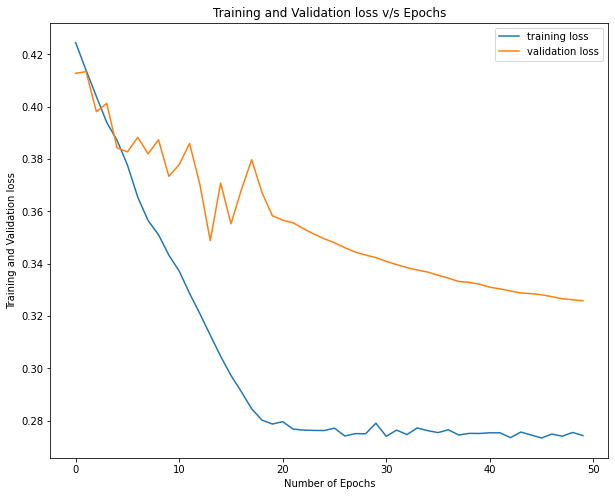

In [ ]:
# call to appropriate function for train history
plot_train_history_with_epochs(training_history)

### Observations:
- The model was optimized using *Adam* optimizer.
- The loss function was custom loss function of *Dice Coefficient* which deals with overlap of masks with detected area.
- The model was evaluated on metrics like *dice coefficient*, *precision* and *recall*.
- The model trained smoothly with decreasing loss.
- Also the metrics across train, validation and test seem to be good.

## Predicting using the saved model

In [ ]:
# copy prediction image
!cp '/content/drive/MyDrive/Colab Notebooks/Part 1Test Data - Prediction Image.jpeg' .

In [ ]:
# verify copying
!ls -l

total 1332532
drwx------ 5 root root       4096 Mar 20 12:43  drive
-rw-r--r-- 1 root root    7575920 Mar 20 14:19  face_mask_model.h5
-rw------- 1 root root 1356868279 Mar 20 12:44  images.npy
-rw------- 1 root root      52325 Mar 20 14:27 'Part 1Test Data - Prediction Image.jpeg'
drwxr-xr-x 1 root root       4096 Mar  9 14:48  sample_data


In [ ]:
# load the prediction image
file_path = '/content/Part 1Test Data - Prediction Image.jpeg'
img = cv2.imread(file_path)
#Resize image
img = cv2.resize(img, dsize= (IMG_WIDTH,IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)
# convert to RGB
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# pre-process as per the model
processed_img = tf.keras.applications.mobilenet_v2.preprocess_input(np.array(img, dtype=np.float32))

# expanding dimensions into tensor
processed_img = np.expand_dims(processed_img,axis=0)

In [ ]:
processed_img.shape

(1, 224, 224, 3)

In [ ]:
# predicting using the best saved model
y_pred = loaded_model.predict(processed_img)

In [ ]:
y_pred.shape

(1, 224, 224, 1)

In [ ]:
# assigning label beyond a threshold and resize
pred_mask = cv2.resize((1.0*(y_pred[0] > 0.7)), (IMG_WIDTH,IMG_HEIGHT))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


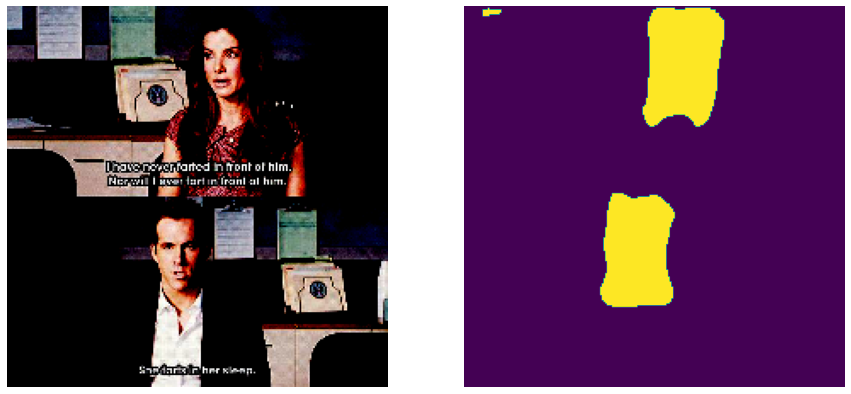

In [ ]:
# visualise masks and images for prediction image
# initialising subplots
figure, ax = plt.subplots(nrows=1, ncols=2)

# setting figure parameters
figure.set_figheight(15)
figure.set_figwidth(15)

# setting images and masks to axis
ax[0].imshow(processed_img[0])
ax[0].axis('off')
ax[1].imshow(pred_mask)
ax[1].axis('off')

plt.show()

### Observations:
- The model mask predictions for the given image seem to be fairly good.
- The model can be tuned further for more better results.

# Project Two - Face Recognition
- **DOMAIN**: Face recognition 
- **CONTEXT**: Company X intends to build a face identification model to recognise human faces.
- **DATA DESCRIPTION**: The dataset comprises of images and its mask where there is a human face.
- **PROJECT OBJECTIVE**: Face Aligned Face Dataset from Pinterest. This dataset contains *10,770* images for *100* people. All images are taken from `Pinterest` and aligned using *dlib* library.

## Import libraries

Most all the libraries are imported from above. We will be re-using them.

In [ ]:
# operating system library
import os

# for visualising images in a grid
from mpl_toolkits.axes_grid1 import ImageGrid

# for pre-processing - encode labels, scaling
from sklearn.preprocessing import LabelEncoder,StandardScaler

# searching for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# for dimensionality reduction using Principal Component Analysis
from sklearn.decomposition import PCA

# ML model libraries
from sklearn import svm, metrics

## Load the dataset

In [ ]:
# copy the content to current directory
!cp '/content/drive/MyDrive/Colab Notebooks/Aligned+Face+Dataset+from+Pinterest+-+CV+project+1.zip' .

In [ ]:
# verify copying
!ls -l

total 467548
-rw------- 1 root root 478756252 Mar 26 12:18 Aligned+Face+Dataset+from+Pinterest+-+CV+project+1.zip
drwx------ 5 root root      4096 Mar 26 12:16 drive
drwxr-xr-x 1 root root      4096 Mar 23 14:22 sample_data


In [ ]:
# unzip the data either using command or zipfile module
!unzip /content/Aligned+Face+Dataset+from+Pinterest+-+CV+project+1.zip

In [ ]:
# verify after unzipping the content
!ls -l

total 467556
-rw-------   1 root root 478756252 Mar 26 12:18 Aligned+Face+Dataset+from+Pinterest+-+CV+project+1.zip
drwx------   5 root root      4096 Mar 26 12:16 drive
drwxr-xr-x   3 root root      4096 Mar 26 12:18 pins
drwxr-xr-x 102 root root      4096 Mar 26 12:18 PINS
drwxr-xr-x   1 root root      4096 Mar 23 14:22 sample_data


In [ ]:
# Observing data structure
!ls -l pins/

total 4
drwxr-xr-x 102 root root 4096 Mar 26 12:18 PINS


In [ ]:
!ls -l pins/PINS

total 568
drwxr-xr-x 2 root root  4096 Mar 26 12:18 'pins_Aaron Paul'
drwxr-xr-x 2 root root 12288 Mar 26 12:18 'pins_alexandra daddario'
drwxr-xr-x 2 root root  4096 Mar 26 12:18 'pins_Alvaro Morte'
drwxr-xr-x 2 root root 12288 Mar 26 12:18 'pins_alycia debnam carey face'
drwxr-xr-x 2 root root  4096 Mar 26 12:18 'pins_Amanda Crew'
drwxr-xr-x 2 root root  4096 Mar 26 12:18 'pins_Amaury Nolasco'
drwxr-xr-x 2 root root 12288 Mar 26 12:18 'pins_amber heard face'
drwxr-xr-x 2 root root  4096 Mar 26 12:18 'pins_Anna Gunn'
drwxr-xr-x 2 root root 12288 Mar 26 12:18 'pins_anne hathaway'
drwxr-xr-x 2 root root 12288 Mar 26 12:18 'pins_barbara palvin face'
drwxr-xr-x 2 root root  4096 Mar 26 12:18 'pins_bellamy blake face'
drwxr-xr-x 2 root root  4096 Mar 26 12:18 'pins_Benedict Cumberbatch'
drwxr-xr-x 2 root root  4096 Mar 26 12:18 'pins_Betsy Brandt'
drwxr-xr-x 2 root root  4096 Mar 26 12:18 'pins_bill gates'
drwxr-xr-x 2 root root 12288 Mar 26 12:18 'pins_Brenton Thwaites'
drwxr-xr-x 2 root 

In [ ]:
!ls -l pins/PINS | wc -l

101


In [ ]:
!ls -l PINS | wc -l

101


In [ ]:
!ls -l PINS/

total 568
drwxr-xr-x 2 root root  4096 Mar 26 04:33 'pins_Aaron Paul'
drwxr-xr-x 2 root root 12288 Mar 26 04:33 'pins_alexandra daddario'
drwxr-xr-x 2 root root  4096 Mar 26 04:33 'pins_Alvaro Morte'
drwxr-xr-x 2 root root 12288 Mar 26 04:33 'pins_alycia debnam carey face'
drwxr-xr-x 2 root root  4096 Mar 26 04:33 'pins_Amanda Crew'
drwxr-xr-x 2 root root  4096 Mar 26 04:33 'pins_Amaury Nolasco'
drwxr-xr-x 2 root root 12288 Mar 26 04:33 'pins_amber heard face'
drwxr-xr-x 2 root root  4096 Mar 26 04:33 'pins_Anna Gunn'
drwxr-xr-x 2 root root 12288 Mar 26 04:33 'pins_anne hathaway'
drwxr-xr-x 2 root root 12288 Mar 26 04:33 'pins_barbara palvin face'
drwxr-xr-x 2 root root  4096 Mar 26 04:33 'pins_bellamy blake face'
drwxr-xr-x 2 root root  4096 Mar 26 04:33 'pins_Benedict Cumberbatch'
drwxr-xr-x 2 root root  4096 Mar 26 04:33 'pins_Betsy Brandt'
drwxr-xr-x 2 root root  4096 Mar 26 04:33 'pins_bill gates'
drwxr-xr-x 2 root root 12288 Mar 26 04:33 'pins_Brenton Thwaites'
drwxr-xr-x 2 root 

In [ ]:
!ls -l 'PINS/pins_Jim Parsons'

total 2588
-rw-r--r-- 1 root root 19071 Oct 21  2019 'Jim Parsons0.jpg'
-rw-r--r-- 1 root root 20054 Oct 21  2019 'Jim Parsons100.jpg'
-rw-r--r-- 1 root root 20086 Oct 21  2019 'Jim Parsons101.jpg'
-rw-r--r-- 1 root root 25099 Oct 21  2019 'Jim Parsons102.jpg'
-rw-r--r-- 1 root root 23095 Oct 21  2019 'Jim Parsons103.jpg'
-rw-r--r-- 1 root root 30489 Oct 21  2019 'Jim Parsons104.jpg'
-rw-r--r-- 1 root root 23304 Oct 21  2019 'Jim Parsons105.jpg'
-rw-r--r-- 1 root root 18134 Oct 21  2019 'Jim Parsons106.jpg'
-rw-r--r-- 1 root root 21270 Oct 21  2019 'Jim Parsons107.jpg'
-rw-r--r-- 1 root root 25884 Oct 21  2019 'Jim Parsons108.jpg'
-rw-r--r-- 1 root root 18024 Oct 21  2019 'Jim Parsons10.jpg'
-rw-r--r-- 1 root root 20894 Oct 21  2019 'Jim Parsons11.jpg'
-rw-r--r-- 1 root root 23343 Oct 21  2019 'Jim Parsons12.jpg'
-rw-r--r-- 1 root root 23232 Oct 21  2019 'Jim Parsons13.jpg'
-rw-r--r-- 1 root root 17757 Oct 21  2019 'Jim Parsons14.jpg'
-rw-r--r-- 1 root root 31904 Oct 21  2019 'Jim Pars

In [ ]:
BASE_PATH = '/content/PINS'

In [ ]:
# initialise the dataframe to hold the metadata
# number of images is redundant and can be omitted
metadata_df = pd.DataFrame(columns=['PERSON','PERSON_BASE_PATH','FILES', 'NUMBER_OF_IMAGES'])

for dirs in os.listdir(BASE_PATH): # list all directories or persons

  if 'PINS_' in dirs.upper(): # check case-insensitive for pinterest
  
    person = dirs[5:].replace(' ','_').upper() # replace space with _
    person_base_path = os.path.join(BASE_PATH,dirs) # get base directory path of each person
    files = [] # initialise a list to hold all corresponding files

    for img_path in os.listdir(os.path.join(BASE_PATH,dirs)):
      files.append(img_path) # get each image path
    number_of_images = len(files) # calculate number of images

    # append to data-frame
    metadata_df.loc[metadata_df.shape[0]] = [person , person_base_path , files , number_of_images]

In [ ]:
# verify top records of data-frame
metadata_df.head()

,PERSON,PERSON_BASE_PATH,FILES,NUMBER_OF_IMAGES
0,EMMA_WATSON_FACE,/content/PINS/pins_emma watson face,"[emma watson face1.jpg, emma watson face4.jpg,...",163
1,GRANT_GUSTIN_FACE,/content/PINS/pins_grant gustin face,"[grant gustin face66.jpg, grant gustin face73....",122
2,BRIT_MARLING,/content/PINS/pins_Brit Marling,"[Brit Marling64_541.jpg, Brit Marling78_453.jp...",122
3,BETSY_BRANDT,/content/PINS/pins_Betsy Brandt,"[Betsy Brandt116_429.jpg, Betsy Brandt122_416....",68
4,TATI_GABRIELLE,/content/PINS/pins_tati gabrielle,"[tati gabrielle33.jpg, tati gabrielle18.jpg, t...",65


In [ ]:
# verify shape of data-frame
metadata_df.shape

(100, 4)

In [ ]:
# checking if all the persons are unique
metadata_df['PERSON'].nunique()

100

In [ ]:
# verifying total number of images
total_images = metadata_df['NUMBER_OF_IMAGES'].sum()
total_images

10770

### Observations:
- There are total of *100* persons.
- For each person there are varying number of images.
- Total number of images are *10770*.

## Visualisation

We will try to visualise *randomly* 10 images for 10 persons.

In [ ]:
# get 10 random index for persons
person_idices = np.random.choice(metadata_df.shape[0],10)

# initialise figure parameters
fig = plt.figure(1, (100, 100))
grid = ImageGrid(fig, 111, nrows_ncols=(10, 10), axes_pad=0.1)
counter = 0

for person_idx in person_idices:
  # get a record from the dataframe
  record = metadata_df.iloc[person_idx]
  person = record['PERSON']
  person_base_path = record['PERSON_BASE_PATH']
  number_of_images = record['NUMBER_OF_IMAGES'] - 1
  files = record['FILES']

  # get randomly 10 indices of images for a person
  image_indices = np.random.choice(number_of_images, 10)
  display_title = True # display title or image

  # display images for a person
  for img_idx in image_indices:
    ax = grid[counter]
    if display_title:
        ax.text(1700, 105, person, verticalalignment='center',fontsize=60)
        display_title = False
    img_path = person_base_path + '/' + files[img_idx]
    img = cv2.imread(img_path)
    img = cv2.resize(img, (150, 150))
    ax.axis("off")
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    counter += 1

plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Load a pre-trained model and it's weights

In [ ]:
# define model params
IMG_SIZE = 224

In [ ]:
# load a model for assigning the pre-trained weights
def vgg_face(img_size=224):	
    model = tf.keras.models.Sequential() # initialise the model

    model.add(tf.keras.layers.ZeroPadding2D((1,1),input_shape=(img_size,img_size, 3)))
    model.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.ZeroPadding2D((1,1)))
    model.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(tf.keras.layers.ZeroPadding2D((1,1)))
    model.add(tf.keras.layers.Convolution2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.ZeroPadding2D((1,1)))
    model.add(tf.keras.layers.Convolution2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(tf.keras.layers.ZeroPadding2D((1,1)))
    model.add(tf.keras.layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(tf.keras.layers.ZeroPadding2D((1,1)))
    model.add(tf.keras.layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(tf.keras.layers.ZeroPadding2D((1,1)))
    model.add(tf.keras.layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(tf.keras.layers.ZeroPadding2D((1,1)))
    model.add(tf.keras.layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(tf.keras.layers.ZeroPadding2D((1,1)))
    model.add(tf.keras.layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(tf.keras.layers.ZeroPadding2D((1,1)))
    model.add(tf.keras.layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(tf.keras.layers.ZeroPadding2D((1,1)))
    model.add(tf.keras.layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(tf.keras.layers.ZeroPadding2D((1,1)))
    model.add(tf.keras.layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(tf.keras.layers.ZeroPadding2D((1,1)))
    model.add(tf.keras.layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(tf.keras.layers.Convolution2D(4096, (7, 7), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Convolution2D(4096, (1, 1), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Convolution2D(2622, (1, 1)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Activation('softmax'))
    return model

In [ ]:
# copy weights to current directory
!cp '/content/drive/MyDrive/Colab Notebooks/vgg_face_weights.h5' .

In [ ]:
# verify the contents
!ls -l

total 1034052
-rw-------   1 root root 478756252 Mar 26 12:18 Aligned+Face+Dataset+from+Pinterest+-+CV+project+1.zip
drwx------   5 root root      4096 Mar 26 12:16 drive
drwxr-xr-x   3 root root      4096 Mar 26 12:18 pins
drwxr-xr-x 102 root root      4096 Mar 26 12:18 PINS
drwxr-xr-x   1 root root      4096 Mar 23 14:22 sample_data
-rw-------   1 root root 580085408 Mar 26 12:19 vgg_face_weights.h5


In [ ]:
# build a placeholder model for loading pre-trained weights
model = vgg_face(IMG_SIZE)

In [ ]:
# load weights to the placeholder model
model.load_weights('/content/vgg_face_weights.h5')

In [ ]:
# getting input layer
model.layers[0].input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_input')>

In [ ]:
# getting output layer
model.layers[-1].output

<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'activation')>

In [ ]:
# getting embedding layer
model.layers[-2].output

<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten')>

In [ ]:
# generating a VGG Face descriptor from the model
vgg_face_descriptor = tf.keras.models.Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [ ]:
# getting the dimensions of each emebedding vector
embedding_dimensions = vgg_face_descriptor.output.shape[1]
embedding_dimensions

2622

### Observations:
- The model expects an input tensor of *224x224x3*, thus some images would require *re-sizing* and *dimension expansion*.
- The output has to be extracted before the *classifier* layer so as to get the **emebedding vectors** of an image, which can be used for **distance/similarity** comparison.

## Generate Embedding Vectors

In [ ]:
# generate embedding vectors for each image

embedding_vectors =  np.zeros((total_images,embedding_dimensions)) # initialise array to hold embedding vectors
embedding_counter = 0

classes = []
for idx in metadata_df.index: # for each record in the data-frame

  each_person = metadata_df.iloc[idx]
  each_person_name = each_person['PERSON']
  each_person_base_path = each_person['PERSON_BASE_PATH']
  each_person_images = each_person['FILES']

  for each_img_idx in range(0,each_person['NUMBER_OF_IMAGES']): # for each image of a person

    # Read - resize - normalize the image
    img_path = each_person_base_path + '/' + each_person_images[each_img_idx]
    img = tf.keras.preprocessing.image.load_img(img_path)
    img_arr = tf.keras.preprocessing.image.img_to_array(img.resize([IMG_SIZE,IMG_SIZE]))

    # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
    img_arr = (img_arr / 255.).astype(np.float32)

    # get the embedding vector for each image tensor
    embedding_vectors[embedding_counter] = vgg_face_descriptor.predict(np.expand_dims(img_arr,axis=0))[0]
    embedding_counter +=1

    # get labels 
    classes.append(each_person_name)

In [ ]:
# verifying the shape of the embedding-vectors
embedding_vectors.shape

(10770, 2622)

In [ ]:
# verifying few records of the embedding-vectors
embedding_vectors[:10]

array([[ 0.0050472 , -0.00430801, -0.0080788 , ..., -0.01274249,
         0.01267068,  0.01951582],
       [ 0.01578406, -0.0115249 ,  0.01688461, ..., -0.02433562,
         0.00350092,  0.01615274],
       [-0.00285404, -0.01575482, -0.01084395, ..., -0.00994424,
        -0.00640306,  0.00934648],
       ...,
       [ 0.00644071,  0.0031547 , -0.00069348, ..., -0.01011371,
         0.00060886,  0.02488079],
       [-0.00235213, -0.00317539,  0.00408626, ..., -0.00564185,
        -0.00172605,  0.02105103],
       [-0.00094291, -0.00751995, -0.00854421, ..., -0.02040366,
        -0.00606529,  0.00617395]])

In [ ]:
np.array(classes).shape

(10770,)

## Distance Metric between Embeddings

For calculation of *similarity* or *dissimilarity* between emebedding vectors, we can use various metrics like:
- Distance Metrics:
  + L1 distance
  + L2 distance
- Similarity Metrics:
  + Cosine Similarity
  + Jaccard Similarity

Here, we will make use of **L2 distance**.

In [ ]:
def l2_distance_metric(emb1, emb2):
  '''
  Calculate Sum of squares of differences
  '''
  return np.sum(np.square(emb1 - emb2))

In [ ]:
def get_normalized_img_arr(img_path):
  '''
  Gets a normalized image array from the image path
  '''
  img = tf.keras.preprocessing.image.load_img(img_path)
  img_arr = tf.keras.preprocessing.image.img_to_array(img.resize([IMG_SIZE,IMG_SIZE]))

  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img_arr = (img_arr / 255.).astype(np.float32)

  return img_arr

In [ ]:
def get_img_arr_name(idx):
  '''
  Gives a pair of image array and name
  '''
  person_record = metadata_df.iloc[idx]
  person_name = person_record['PERSON']
  person_base_path = person_record['PERSON_BASE_PATH']
  person_files = person_record['FILES']
  person_number_of_images = person_record['NUMBER_OF_IMAGES']

  random_images = np.random.randint(0,person_number_of_images,2)
  # Read - resize - normalize the image
  img_path = person_base_path + '/' + person_files[random_images[0]]
  img_arr1 = get_normalized_img_arr(img_path)

  img_path = person_base_path + '/' + person_files[random_images[1]]
  img_arr2 = get_normalized_img_arr(img_path)

  return person_name,img_arr1, img_arr2

In [ ]:
def get_positive_negative_pairs():
  '''
  Gives a positive pair of embeddings and negative pair of embeddings
  '''
  random_pair_indices = np.random.randint(0,metadata_df.shape[0],2)

  # first person details
  person1, img_arr11, img_arr12 = get_img_arr_name(random_pair_indices[0])

  # second person details
  person2, img_arr21, img_arr22 = get_img_arr_name(random_pair_indices[1])

  # get embeddings
  emb11 = vgg_face_descriptor.predict(np.expand_dims(img_arr11,axis=0))[0]
  emb12 = vgg_face_descriptor.predict(np.expand_dims(img_arr12,axis=0))[0]
  emb21 = vgg_face_descriptor.predict(np.expand_dims(img_arr21,axis=0))[0]
  emb22 = vgg_face_descriptor.predict(np.expand_dims(img_arr22,axis=0))[0]

  positive_pair = ((person1,person1),(emb11,emb12),(img_arr11, img_arr12))
  negative_pair = ((person1,person2),(emb11,emb21),(img_arr11, img_arr21))

  return positive_pair,negative_pair

In [ ]:
# display embeddings and corresponding images
def show_pair(pair):
  # initialising subplots
  figure, ax = plt.subplots(nrows=1, ncols=2,constrained_layout=True)

  # setting figure parameters
  figure.set_figheight(15)
  figure.set_figwidth(15)

  figure.suptitle(f'Distance = {l2_distance_metric(pair[1][0], pair[1][1]):.4f}', fontsize=16)

  # setting images
  ax[0].imshow(pair[2][0])
  ax[0].set_title(pair[0][0])
  ax[0].axis('off')
  ax[1].imshow(pair[2][1])
  ax[1].set_title(pair[0][1])
  ax[1].axis('off')

  plt.tight_layout()
  plt.show()

In [ ]:
positive_pair,negative_pair = get_positive_negative_pairs()

In [ ]:
positive_pair

(('JEFF_BEZOS', 'JEFF_BEZOS'),
 (array([ 0.00210719, -0.00891261,  0.01853747, ..., -0.00938883,
          0.01012283,  0.00715792], dtype=float32),
  array([ 0.01421697, -0.02232722,  0.01497093, ..., -0.00877767,
          0.01047427, -0.00585749], dtype=float32)),
 (array([[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 

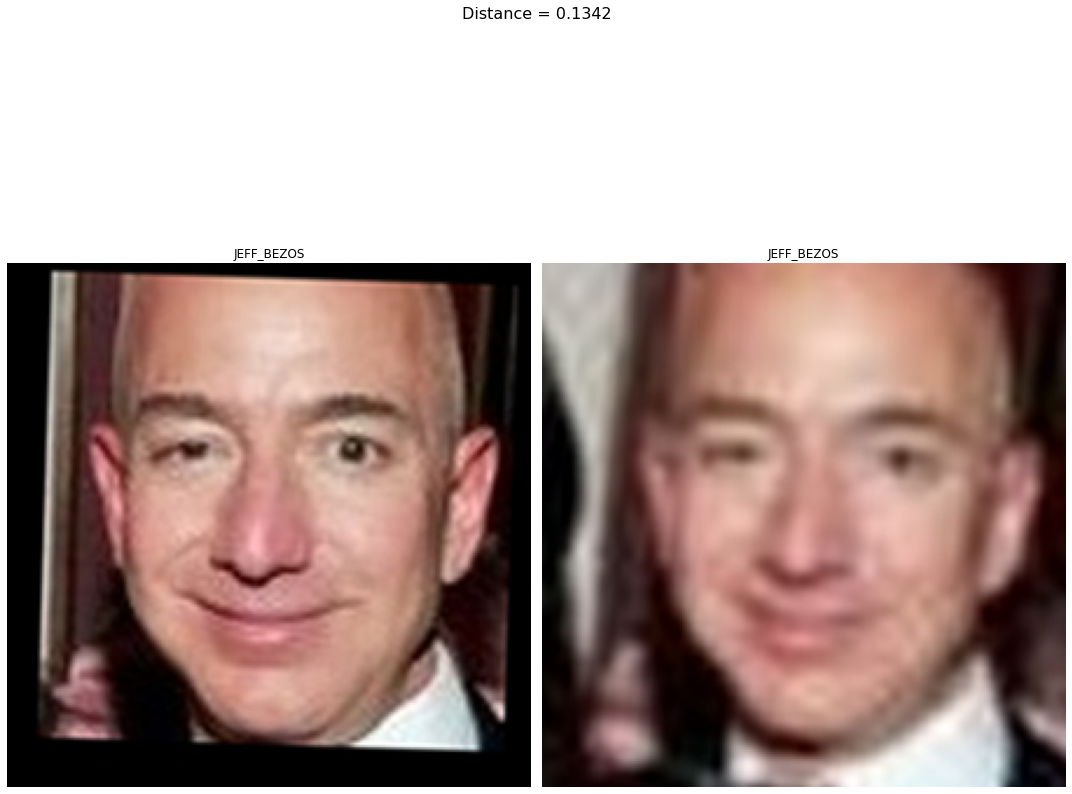

In [ ]:
show_pair(positive_pair)

In [ ]:
negative_pair

(('JEFF_BEZOS', 'BRIT_MARLING'),
 (array([ 0.00210719, -0.00891261,  0.01853747, ..., -0.00938883,
          0.01012283,  0.00715792], dtype=float32),
  array([ 0.0125706 ,  0.0097119 , -0.00091843, ..., -0.03644164,
         -0.0009713 ,  0.0062989 ], dtype=float32)),
 (array([[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0.

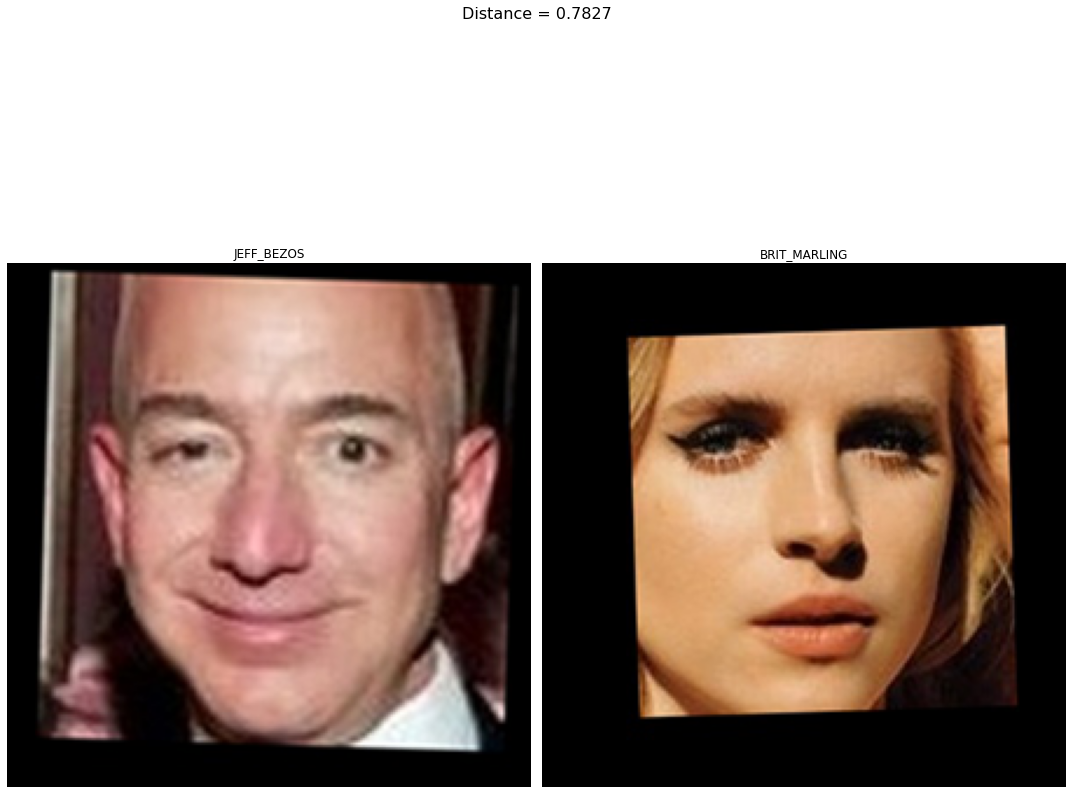

In [ ]:
show_pair(negative_pair)

### Observations:
- The *L2 distance* between the *embeddings* of a *positive-pair*(same images) is *low*, indicating *high similarity*.
- The *L2 distance* between the *embeddings* of a *negative-pair*(different images) is *high*, indicating *high dissimilarity*.

## Split in train and Validation sets

In [ ]:
# every 9th example goes in test data and rest go in train data
train_idx = np.arange(embedding_vectors.shape[0]) % 9 != 0     
test_idx = np.arange(embedding_vectors.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embedding_vectors[train_idx]

# another half as test examples of 10 identities
X_test = embedding_vectors[test_idx]

classes = np.array(classes)
#train labels
y_train = classes[train_idx]

#test labels
y_test = classes[test_idx]

print(f'X_train shape : ({X_train.shape[0]},{X_train.shape[1]})')
print(f'y_train shape : ({y_train.shape[0]},)')
print(f'X_test shape : ({X_test.shape[0]},{ X_test.shape[1]})')
print(f'y_test shape : ({y_test.shape[0]},)')

X_train shape : (9573,2622)
y_train shape : (9573,)
X_test shape : (1197,2622)
y_test shape : (1197,)


## Encode the labels

In [ ]:
le = LabelEncoder() # initialise the encoder

# encode the labels
y_train_encoded = le.fit_transform(y_train) 
y_test_encoded = le.transform(y_test)

In [ ]:
y_train_encoded

array([38, 38, 38, ...,  5,  5,  5])

In [ ]:
y_test_encoded

array([38, 38, 38, ...,  5,  5,  5])

## Standardise feature values
For **PCA** it is important to have normalized/scaled feature values so that the components are not biased towards specific feature values

In [ ]:
scaler = StandardScaler() # initialise the scaler

# scale the feature values
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## Dimensionality Reduction using PCA

As each of our embeddings have 2622 features, we can reduce the dimensions.

PCA is a way of linearly transforming the data such that most of the information in the data is contained within a smaller number of features called components.

In [ ]:
def evaluate_the_model(model,model_name,X_train,y_train,X_test,y_test):
  # predict on test data
  y_pred = model.predict(X_test)
  predictions[model_name] = y_pred

  train_accuracy = model.score(X_train,y_train)
  test_accuracy = model.score(X_test,y_test)
  accuracies[model_name] = [train_accuracy,test_accuracy]

  print(f'The accuracy score of model on train data is {round(train_accuracy,4)*100}%')
  print(f'The accuracy score of model on test data is {round(test_accuracy,4)*100}%')
  print()

  acc= metrics.accuracy_score(y_test, y_pred)
  print('Accuracy Score :','%0.2f' % acc)
  model_lists.append([model_name, acc * 100])

In [ ]:
# initialised a dictionary to hold accuracy of various models
# {model: [train_accuracy,test_accuracy]}
accuracies = {}

In [ ]:
# initialised a dictionary to hold predictions of various models
# {model: [predictions]}
predictions = {}

In [ ]:
model_lists = [] # initialise to hold various model parameters

In [ ]:
pca = PCA(n_components=500) # initialisize PCA with 500 components

# transform the scaled feature values
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

## Building a Support Vector Machine

In [ ]:
# hyper-parameters to search from
param_grid = {'C': [0.1,1,5], 'gamma': [0.01,0.001],'kernel': ['rbf', 'linear']}

# grid search classifier
svm_grid= GridSearchCV(svm.SVC(), param_grid, verbose = 2,cv=5, n_jobs = -1)
 
# # fit on samples
svm_grid.fit(X_train_pca, y_train_encoded)

# getting the best parameters
svm_grid.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}

In [ ]:
# call to the function
evaluate_the_model(svm_grid,'SVM with Grid Search CV',X_train_pca,y_train_encoded,X_test_pca,y_test_encoded)

The accuracy score of model on train data is 99.98%
The accuracy score of model on test data is 96.41%

Accuracy Score : 0.96


In [ ]:
model_df = pd.DataFrame(model_lists, columns = ['Model', 'Accuracy Scores on Test'])
model_df

,Model,Accuracy Scores on Test
0,SVM with Grid Search CV,96.407686


In [ ]:
accuracy_df = pd.DataFrame(accuracies,index=['Train Accuracy','Test Accuracy'])
accuracy_df

,SVM with Grid Search CV
Train Accuracy,0.999791
Test Accuracy,0.964077


### Observations:
- We obtained the best hyper-parameters of the **SVM** using **GridSearchCV**.
- The model performs well on train and validation data.

## Predicting using trained SVM

In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/Part 2 - Test Image - Dwayne Johnson4.jpg' .

In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/Part 2- Test Image - Benedict Cumberbatch9.jpg' .

In [ ]:
!ls -l

total 1034108
-rw-------   1 root root 478756252 Mar 26 12:18  Aligned+Face+Dataset+from+Pinterest+-+CV+project+1.zip
drwx------   5 root root      4096 Mar 26 12:16  drive
-rw-------   1 root root     30905 Mar 26 13:59 'Part 2- Test Image - Benedict Cumberbatch9.jpg'
-rw-------   1 root root     24417 Mar 26 13:59 'Part 2 - Test Image - Dwayne Johnson4.jpg'
drwxr-xr-x   3 root root      4096 Mar 26 12:18  pins
drwxr-xr-x 102 root root      4096 Mar 26 12:18  PINS
drwxr-xr-x   1 root root      4096 Mar 23 14:22  sample_data
-rw-------   1 root root 580085408 Mar 26 12:19  vgg_face_weights.h5


In [ ]:
def prediction_pipeline(img_path, actual_label):
  img = tf.keras.preprocessing.image.load_img(img_path)
  img_arr = tf.keras.preprocessing.image.img_to_array(img.resize([IMG_SIZE,IMG_SIZE]))

  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img_arr = (img_arr / 255.).astype(np.float32)

  # get the embedding vector for each image tensor
  embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img_arr,axis=0))[0]

  # scale the feature values
  embedding_vector_scaled = scaler.transform(np.expand_dims(embedding_vector,axis=0))

  # transform the scaled feature values
  embedding_vector_pca = pca.transform(embedding_vector_scaled)

  # make a prediction
  y_pred = svm_grid.predict(embedding_vector_pca)

  print(f'Actual Label: {actual_label.upper()}')
  print(f'Predicted Encoded Label: {y_pred[0]}')
  print(f'Predicted Label: {le.inverse_transform(y_pred)[0]}')

In [ ]:
prediction_pipeline('/content/Part 2- Test Image - Benedict Cumberbatch9.jpg','Benedict Cumberbatch')

Actual Label: BENEDICT CUMBERBATCH
Predicted Encoded Label: 11
Predicted Label: BENEDICT_CUMBERBATCH


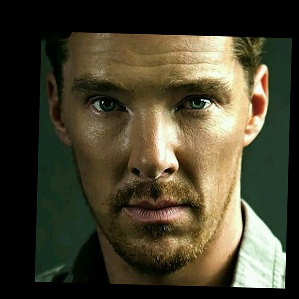

In [ ]:
tf.keras.preprocessing.image.load_img('/content/Part 2- Test Image - Benedict Cumberbatch9.jpg')

In [ ]:
prediction_pipeline('/content/Part 2 - Test Image - Dwayne Johnson4.jpg','Dwayne Johnson')

Actual Label: DWAYNE JOHNSON
Predicted Encoded Label: 31
Predicted Label: DWAYNE_JOHNSON


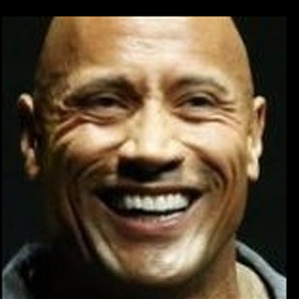

In [ ]:
tf.keras.preprocessing.image.load_img('/content/Part 2 - Test Image - Dwayne Johnson4.jpg')

In [8]:
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/ADVANCED_COMPUTER_VISION_PROJECT.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/ADVANCED_COMPUTER_VISION_PROJECT.ipynb to html
[NbConvertApp] Writing 4455567 bytes to /content/drive/MyDrive/Colab Notebooks/ADVANCED_COMPUTER_VISION_PROJECT.html
